In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
#reads in base csv data, adds column names and sets appreiate datatypes
df = pd.read_csv (r'.\Myoware Testing Data\2 Sensor Test data\Tripod\Kaylee\Test 3\Test 3.csv')

df.columns = ['Time', 'myoware1', 'myoware2']
df = df.astype({'Time':'int', 'myoware1':'float', 'myoware2':'float'})           
df.head()

,Time,myoware1,myoware2
0,547650,0.15,0.64
1,548188,0.17,0.63
2,548729,0.17,0.63
3,549265,0.18,0.62
4,549807,0.17,0.62


In [32]:
#retreives starting reference time to normalize time data readings
baseTime = df.iat[0,0]
df["Time"] = df["Time"] - baseTime
df.head()

,Time,myoware1,myoware2
0,0,0.15,0.64
1,538,0.17,0.63
2,1079,0.17,0.63
3,1615,0.18,0.62
4,2157,0.17,0.62


<IPython.core.display.Javascript object>


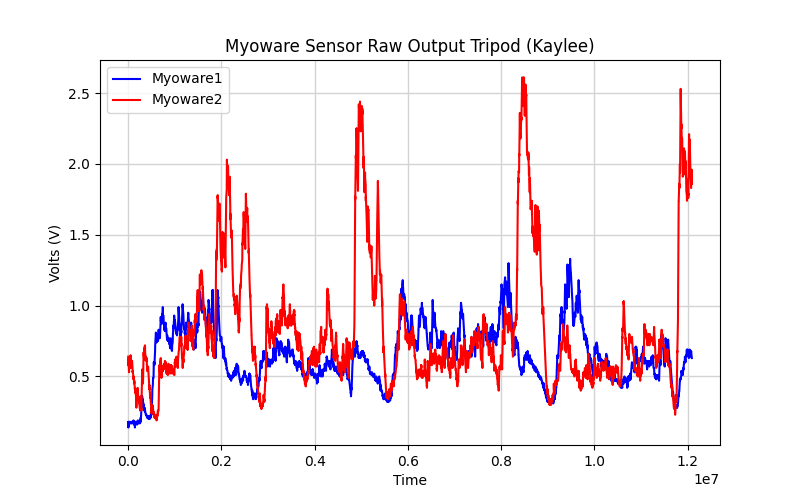

In [33]:
#reads in dataframe values then create base graph
Time = np.array(df['Time'])
myoware1 = np.array(df['myoware1'])
myoware2 = np.array(df['myoware2'])

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time, myoware1, color ="blue", label="Myoware1")
plt.plot(Time, myoware2, color ="red", label="Myoware2")

plt.legend(loc="upper left" )
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Myoware Sensor Raw Output Tripod (Kaylee)")
# To show the plot
plt.show()

<IPython.core.display.Javascript object>


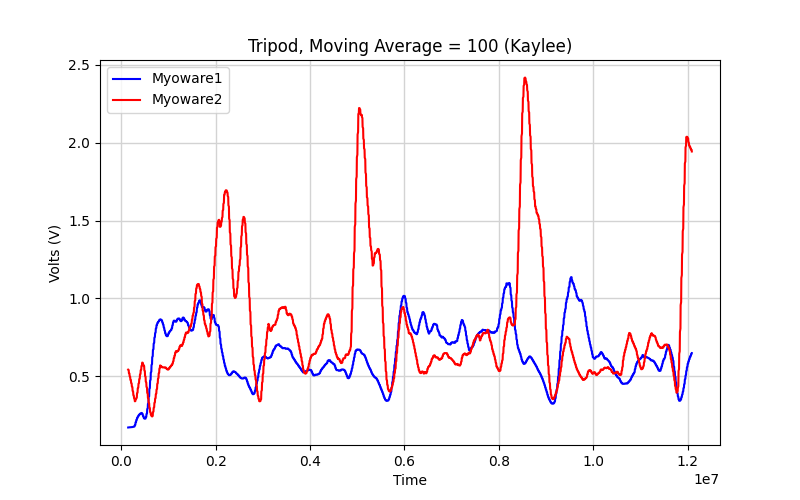

In [34]:
#Moving average
avg = 100

avgMyoware1 = np.array(df["myoware1"].rolling(avg).mean())
avgMyoware2 = np.array(df["myoware2"].rolling(avg).mean())

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time, avgMyoware1, color ="blue", label="Myoware1")
plt.plot(Time, avgMyoware2, color ="red", label="Myoware2")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Moving Average = 100 (Kaylee)")
plt.show()

In [35]:
#Frequency division Number represents the devision taking place 5 = every 5th row or freq/5
freq = df.iloc[::18, :]
freq.head()

,Time,myoware1,myoware2
0,0,0.15,0.64
18,19957,0.17,0.54
36,50127,0.17,0.61
54,80299,0.17,0.60
72,110473,0.17,0.49


<IPython.core.display.Javascript object>


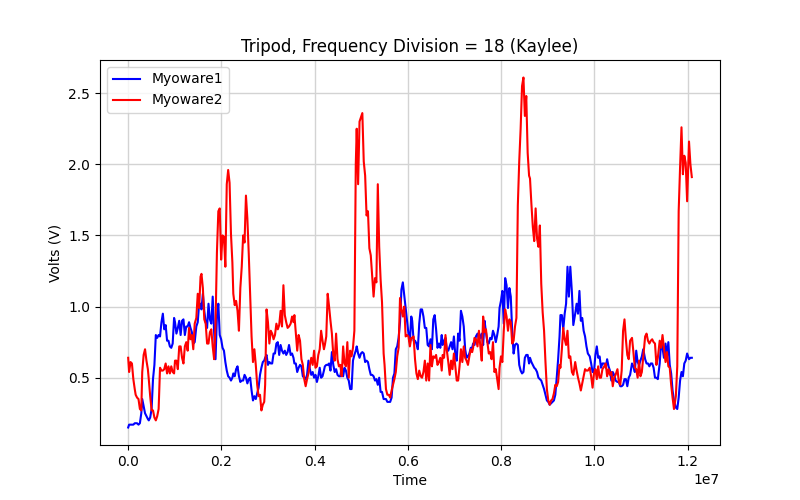

Text(0.5, 1.0, 'Tripod, Frequency Division = 18 (Kaylee)')

In [36]:
freqTime = np.array(freq['Time'])
freqMyoware1 = np.array(freq['myoware1'])
freqMyoware2 = np.array(freq['myoware2'])

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(freqTime, freqMyoware1, color ="blue", label="Myoware1")
plt.plot(freqTime, freqMyoware2, color ="red", label="Myoware2")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Frequency Division = 18 (Kaylee)")

<IPython.core.display.Javascript object>


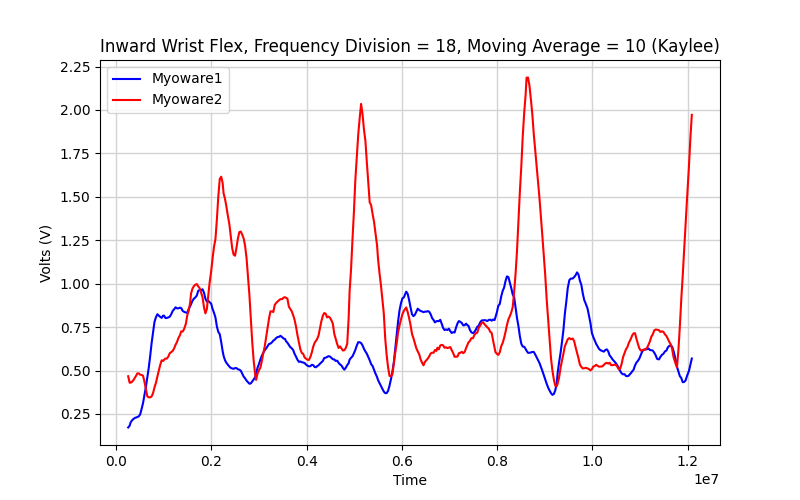

In [37]:
#Moving average of frequency division
freqAvg = 10

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

avgFreqMyoware1 = np.array(freq["myoware1"].rolling(freqAvg).mean())
avgFreqMyoware2 = np.array(freq["myoware2"].rolling(freqAvg).mean())

plt.plot(freqTime, avgFreqMyoware1, color ="blue", label="Myoware1")
plt.plot(freqTime, avgFreqMyoware2, color ="red", label="Myoware2")

plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Inward Wrist Flex, Frequency Division = 18, Moving Average = 10 (Kaylee)")
plt.show()

In [38]:
#preps data for FFT
def highestPowerof2(n):
    res = 0;
    for i in range(n, 0, -1):
         
        # If i is a power of 2
        if ((i & (i - 1)) == 0):
         
            res = i;
            break;
         
    return res;

maxSamples = highestPowerof2(len(myoware1))

#truncates myoware data to neaarest power of 2
truncMyoware1 = np.array(df["myoware1"].head(maxSamples)) #truncates myoware data to neaarest power of 2
truncMyoware2 = np.array(df["myoware2"].head(maxSamples))

print(truncMyoware1)


[0.15 0.17 0.17 ... 0.78 0.78 0.75]


<IPython.core.display.Javascript object>


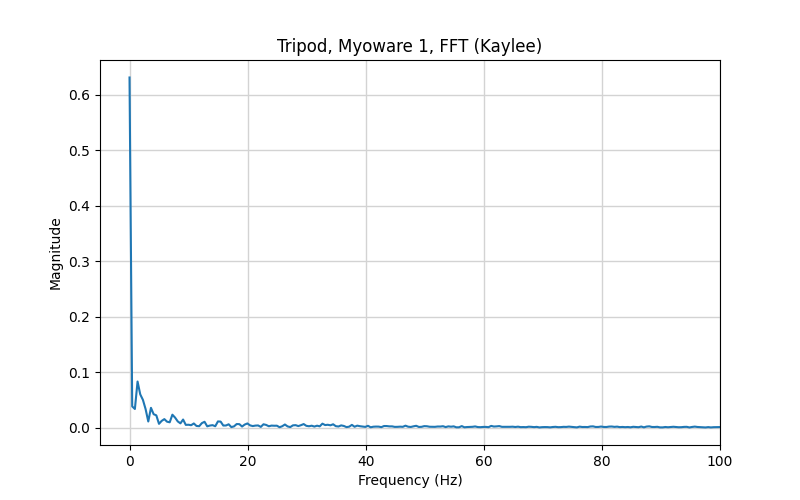

<IPython.core.display.Javascript object>


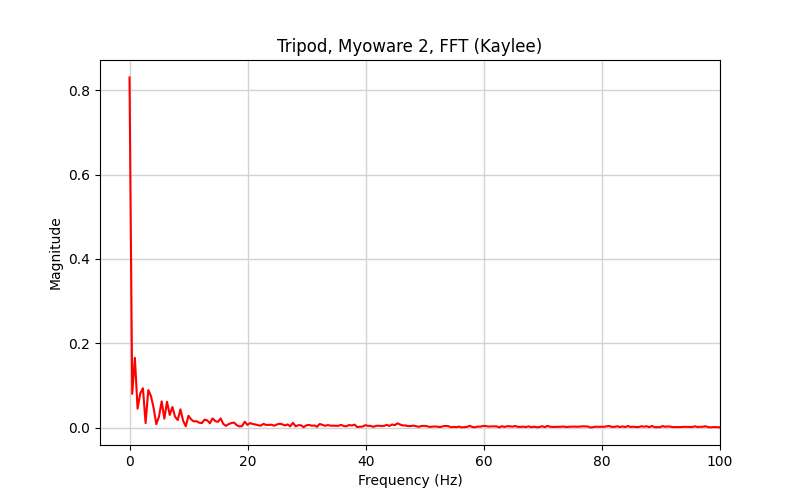

Text(0.5, 1.0, 'Tripod, Myoware 2, FFT (Kaylee)')

In [39]:
#Fast Fourier Transform of raw data - used to pinpoint highest freuqncy and compare relevency
#of freqnecy to the sampling data above to best determine optimal sampling frequency
#print(np.fft.fft(myoware1, n=None, axis=- 1, norm=None ))
sampleFreq = 1858 #Sampling Frequency
tstep = 1/sampleFreq #time step interval

#myoware1
myoware1FFT = np.fft.fft(truncMyoware1)
myoware1FFT_mag = np.abs(myoware1FFT) / maxSamples

#myoware2
myoware2FFT = np.fft.fft(truncMyoware2)
myoware2FFT_mag = np.abs(myoware2FFT) / maxSamples

fftFrequency = np.linspace(0, sampleFreq, maxSamples)

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.xlim(-5, 100)

plt.plot(fftFrequency,myoware1FFT_mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel("Magnitude")
plt.title("Tripod, Myoware 1, FFT (Kaylee)")

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.xlim(-5, 100)

plt.plot(fftFrequency,myoware2FFT_mag, color ="red")
plt.xlabel('Frequency (Hz)')
plt.ylabel("Magnitude")
plt.title("Tripod, Myoware 2, FFT (Kaylee)")

